<div style="color: red;">

# **１章　ニューラルネットワークの復習**

<div style="color: black; font-size: 20px">

本書は、前作『ゼロから作るDeep Learning』の続編です。  
前作同様、ライブラリやフレームワークなどの既製品は使わずに、「ゼロから作る」ことを重視します。

本章では、ニューラルネットワークの復習を行います。つまり、前作のダイジェスト版に相当します。  
本作では効率性を重視して、前作での実装ルールを一部変更した点があります（メソッド名やパラメータ  
の持ち方など）。
</div>

<div style="color: red;">

## **1.1 数学とPython の復習**
</div>

<div style="color: black; font-size: 20px">

テーマは、ニューラルネットワークの計算に必要な「**ベクトル**」や「**行列**」  です。  
合わせて、Python によるコード ――特にNumPy を使ったコード―― も示します。
</div>

<div style="color: red;">

### **1.1.1 ベクトルと行列**
</div>

<div style="color: black; font-size: 20px">

ここでは、ニューラルネットワークを扱う際にいたるところで登場する、  
「ベクトル」や「行列」（または「テンソル」）について簡単に整理します。  

**ベクトル**とは、大きさと向きを持つ量で、数が一列に並んだ集まりとして表現できます。  
Python による実装では１次元の配列として扱うことができます。  
**行列**は、２次元状（長方形状）に並んだ数の集まりです。

ベクトルと行列の例を示すと図1-1 のようになります。  

![代替テキスト](../images/Section1/図1-1_ベクトルと行列の例.png)

図1-1 で示すように、ベクトルは１次元の配列、行列は２次元の配列で表現できます。

また行列では、横方向の並びを行（row）と言い、縦方向の並びを列（column）と言います。  
そのため、図1-1 の行列は「３行２列の行列」と呼び、また「３×２の行列」と表記します。  

![代替テキスト](../images/Section1/Hint1_1-1.png)
</div>

<div style="color: black; font-size: 20px">

ベクトルの表現方法には2種類あります。  
図1-2 に示すように、ひとつは縦方向の並びとして表す**列ベクトル**、もうひとつは横方向の並びとして表す**行ベクトル**です。  

![代替テキスト](../images/Section1/図1-2_ベクトルの表し方.png)

数学やディープラーニングなどの多くの分野では、ベクトルは「列ベクトル」として扱うのが一般的です。  
ただし、本書では実装面の親和性を考慮して、ベクトルは「行ベクトル」として扱います。  
また、ベクトルや行列を数式で書く際には、単一の要素（スカラ）とは区別するため、太字の記号（$\bold{x}$ や $\bold{W}$ など）で表します。  

それでは、Python の対話モードを使って、ベクトルや行列を生成してみましょう。
</div>

In [1]:
import numpy as np

x = np.array([1, 2, 3])

print("x のクラス:", x.__class__) 
print("x の形状　:", x.shape)
print("x の次元数:", x.ndim)
print(x)

x のクラス: <class 'numpy.ndarray'>
x の形状　: (3,)
x の次元数: 1
[1 2 3]


In [2]:
W = np.array([[1, 2, 3], [4, 5, 6]])
print("W の形状　: ", W.shape)
print("W の次元数: ", W.ndim)
print(W)

W の形状　:  (2, 3)
W の次元数:  2
[[1 2 3]
 [4 5 6]]


<div style="color: black; font-size: 20px">

ベクトルや行列は <span style="font-family: consolas;">np.array()</span> メソッドで生成することができます。  
このメソッドによって、NumPy の多次元配列用のクラスである <span style="font-family: consolas;">np.ndarray</span> （N-dimensional array: N次元配列）クラスが生成されます。  

上の例では、<span style="font-family: consolas;">np.ndarray</span> クラスのインスタンス変数である <span style="font-family: consolas;">shape</span> と <span style="font-family: consolas;">ndim</span> を利用しています。  
<span style="font-family: consolas;">shape</span> は多次元配列の形状を、<span style="font-family: consolas;">ndim</span> は次元数を表します。  
<span style="font-family: consolas;">**x**</span> は１次元の配列であり、要素数は３のベクトルです。<span style="font-family: consolas;">**W**</span> は２次元の配列であり、２×３の行列です。
</div>

<div style="color: red;">

### **1.1.2 行列の要素ごとの演算**
</div>

<div style="color: black; font-size: 20px">

数の集まりを「ベクトル」や「行列」としてまとめることができました。  
それでは、それらを使って簡単な計算を行ってみましょう。  
ここでは初めに「要素ごとの演算」について見ていきます。  
<!-- ちなみに、「要素ごとの」とは英語で element-wise と言います。 -->
</div>

In [3]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])

print(W + X)
print()
print(W * X)

[[ 1  3  5]
 [ 7  9 11]]

[[ 0  2  6]
 [12 20 30]]


<div style="color: black; font-size: 20px">

ここでは NumPy の多次元配列に対して、＋（足し算）や ＊（掛け算）などの四則演算を行っています。  
このとき、多次元配列中の要素ごとで ――各要素で独立して―― 演算が行われます。  
これが NumPy 配列の「要素ごとの演算」です。  
</div>

<div style="color: red;">

### **1.1.3 ブロードキャスト**
</div>

<div style="color: black; font-size: 20px">

NumPy の多次元配列では、形状の異なる配列どうしの演算も可能です。  
たとえば、次のような計算です。
</div>

In [4]:
A = np.array([[1, 2], [3, 4]])
A * 10

array([[10, 20],
       [30, 40]])

<div style="color: black; font-size: 20px">

この計算では、２×２の行列 <span style="font-family: consolas;">**A**</span> に対して、10というスカラ値の乗算を行っています。

このとき図1-3 で示すように、10というスカラ値が２×２の行列に拡張されて、その後で要素ごとの演算が行われます。  
この賢い機能は、<span style="color: red;">ブロードキャスト</span>（broadcast）と呼ばれます。

![代替テキスト](../images/Section1/図1-3_ブロードキャストの例1.png)  

ブロードキャストの別の例として、次の計算を見てみましょう。
</div>

In [5]:
A = np.array([[1, 2], [3, 4]])
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

<div style="color: black; font-size: 20px">

この計算では、図1-4 のように、１次元配列である <span style="font-family: consolas;">**b**</span> が２次元配列 <span style="font-family: consolas;">**A**</span> と同じ形状になるように"賢く"拡張されます。

![代替テキスト](../images/Section1/図1-4_ブロードキャストの例2.png)  

このように、NumPy ではブロードキャストという機能があるため、形状の異なる配列どうしの演算をスマートに行うことができます。
</div>

<div style="color: red;">

### **1.1.4 ベクトルの内積と行列の積**
</div>

<div style="color: black; font-size: 20px">

続いて、「ベクトルの内積」と「行列の積」について見ていきます。  
ベクトルの内積は、数式で次のように表されます。

$ \qquad\qquad\qquad \bold{x}\sdot\bold{y}=x_1y_1 + x_2y_2 + \dots + x_ny_n \qquad\qquad (1.1) $

ここでは２つのベクトル $\bold{x} = (x_1, \dots , x_n)$ と $\bold{y} = (y_1, \dots , y_n)$ があると仮定します。  
このとき式$(1.1)$ が示すように、ベクトルの内積は、２つのベクトル間の対応する要素の  
積を足し合わせたものになります。

![代替テキスト](../images/Section1/Hint1_1-2.png) 
</div>

<div style="color: black; font-size: 20px">

続いて「行列の積」についてです。行列の積は、図1-5 の手順に従って計算します。

![代替テキスト](../images/Section1/図1-5_行列の積の計算方法.png) 

図1-5 のとおり、行列の積は「左の行列の行ベクトル」と「右の行列の列ベクトル」の内積によって計算されます。  
このとき、その計算結果は新しい行列の対応する要素に格納されます。  
たとえば、$\bold{A}$ の１行目と $\bold{B}$ の１列目の結果は１行１列目の要素へ、$\bold{A}$ の２行目と$\bold{B}$  の１列目の結果は２行１列目の要素へ...といったようになります。  
ベクトルの内積と行列の積を Python で実装すると次のようになります。
</div>

In [6]:
# ベクトルの内積
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.dot(a, b)

32

In [7]:
# 行列の積
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

np.dot(A, B)

array([[19, 22],
       [43, 50]])

<div style="color: black; font-size: 20px">

ここで示したように、ベクトルの内積も、行列の積も <span style="font-family: Consolas">np.dot()</span> で計算できます。  
<span style="font-family: Consolas">np.dot(x, y)</span> の引数がともに１次元配列の場合はベクトルの内積を計算し、引数が２次元配列の場合は行列の積を計算します。
![代替テキスト](..\images/Section1/Hint1_1-3.png) 
</div>

<div style="color: red;">

### **1.1.5 行列の形状チェック**
</div>

<div style="color: black; font-size: 20px">

行列やベクトルを使った計算においては、その「形状」に注意を払うことが重要です。  
ここでは「行列の積」に関して、形状に注目して再度見ていきたいと思います。  
行列の積を計算するときは、図1-6 で示す「形状チェック」が重要になります。

![代替テキスト](../images/Section1/図1-6_形状チェック.png) 

図1-6 では、３×２の行列$\bold{A}$ と２×４の行列$\bold{B}$ の積によって、３×４の行列$\bold{C}$ が生成されています。  
このとき、図が示すように、$\bold{A}$ と $\bold{B}$ の対応する次元の要素数を一致させる必要があります。  
そして、結果となる行列$\bold{C}$ は、$\bold{A}$の行数と $\bold{B}$の列数から構成されるようにします。これが行列の「形状チェック」です。

![代替テキスト](../images/Section1/Hint1_1-4.png) 
</div>

<div style="color: red;">

## **1.2 ニューラルネットワークの推論**
</div>

<div style="color: black; font-size: 20px">

ここから、ニューラルネットワークの復習です。  
ニューラルネットワークで行う処理は、「学習」と「推論」の２つのフェーズに分けられます。  
ここではニューラルネットワークの「推論」だけにフォーカスし、次節で「学習」について見ていきます。
</div>

<div style="color: red;">

### **1.2.1 ニューラルネットワークの推論の全体図**
</div>

<div style="color: black; font-size: 20px">

ニューラルネットワークは、簡単に言ってしまえば、単なる「関数」です。  
関数とは、"何かを入力したら何かが出力される変換器" ですが、ニューラルネットワークも入力を出力へと変換します。  

ここでは例として、２次元のデータを入力して、３次元のデータを出力する関数を考えます。  
これをニューラルネットワークで実現するには、入力層にニューロンを２つ、出力層にニューロンを３つそれぞれ用意します。  
そして隠れ層（中間層）にもいくつかニューロンを配置します。ここでは隠れ層に４つのニューロンを置くことにしましょう。  

そうすると、私たちのニューラルネットワークは図1-7 のように書けます。

![代替テキスト](../images/Section1/図1-7_ニューラルネットワークの例.png)

図1-7 では、ニューロンを ○ で表し、そのつながりを矢印で表しています。  
このとき、矢印に**重み**が存在し、その重みとニューロンの値がそれぞれ乗算され、その和が次のニューロンへの入力となります。  
※正確には、それに活性化関数を適用した値が次のニューロンへの入力となる。

またこのとき、前層のニューロンの値には影響を受けない「定数」も加算されます。この定数は **バイアス** と呼ばれます。  
なお、図1-7 のニューラルネットワークは、隣接するニューロン間のすべてに結びつきがあります。これを **全結合層** と呼びます。

![代替テキスト](../images/Section1/Hint1_1-5.png) 
</div>

<div style="color: black; font-size: 20px">

それでは、図1-7 のニューラルネットワークが行う計算を数式で表します。

ここでは入力層のデータを $(x_1, x_2)$ で表し、重みを $w_{11}$ と $w_{21}$、バイアスを $b_1$ と表します。  
そうすると、図1-7 で示す隠れ層のうちの１番上のニューロンは、次のように計算されます。

$ \quad $  
$ \displaystyle\qquad\qquad\qquad\qquad\qquad
    h_1 = x_1w_{11} + x_2w_{21} + b_1
\qquad (1.2)$

$\quad$  
式$(1.2)$ のように、隠れ層のニューロンは重み付き和によって計算されます。  
あとは、重みとバイアスの値を変えながら、式$(1.2)$ の計算をニューロンの数だけ繰り返し行うことで、隠れ層のすべてのニューロンの値を求めることができます。  

ここで重要なことは、重みとバイアスの添字の規則ではなく、それが「重み付き和で計算される」ことと「行列の積でまとめて計算できる」ということです。  
実際、全結合層による変換は、行列の積として、次のようにまとめて書くことができます。

$ \quad $  
$ \displaystyle\qquad
    (h_1, h_2, h_3, h_4) = (x1, x2)
    \begin{pmatrix}
        w_{11} & w_{12} & w_{13} & w_{14}\\
        w_{21} & w_{22} & w_{23} & w_{24}
    \end{pmatrix}
     + (b_1, b_2, b_3, b_4)
\qquad (1.3) $

$\quad$  
ここで、隠れ層のニューロンは $(h_1, h_2, h_3, h_4)$ としてまとめており、これは１×４の行列とみなすことができます。  
また入力は $(x_1, x_2)$ であり、これは１×２の行列です。そして重みは２×４の行列、バイアスは１×４の行列に対応します。  
そうすると、式$(1.3)$ は次のように簡略化して書くことができます。

$ \quad $  
$ \qquad\qquad\qquad\qquad\qquad\qquad
    \bold{h} = \bold{xW} + \bold{b} 
\qquad (1.4)$

$\quad$  
入力を $\bold{x}$、隠れ層のニューロンを $\bold{h}$、重みを $\bold{W}$、バイアスを $\bold{b}$ で表しています。
</div>

<div style="color: black; font-size: 20px">

このとき、式$(1.4)$ の行列の形状に注目すると、次のように変換されることが分かります。

![代替テキスト](../images/Section1/図1-8_形状チェック2.png) 

図1-8 に示すとおり、行列の積では、対応する次元の要素数を一致させます。  
このように行列の形状を見ることで、それが正しい変換であることが確認できます。

![代替テキスト](../images/Section1/Hint1_2-1.png) 
</div>

<div style="color: black; font-size: 20px">

これで全結合層による変換を、行列としてまとめて計算することができました
 
しかし、ここで行った変換はひとつのサンプルデータ（入力データ）だけを対象にしています。  
ニューラルネットワークの分野では、複数のサンプルデータ（ミニバッチ）に対して、一斉に推論や学習を行います。  
それを行うには、行列 $\bold{x}$ の各行に個別のサンプルデータを格納します。  
たとえば $N$ 個のサンプルデータをミニバッチとしてまとめて処理するとすれば、行列の形状に注目すると、次のように推移します。

![代替テキスト](../images/Section1/図1-9_形状チェック3.png) 

図1-9 に示すように、形状チェックによって、各バッチが正しく変換されていることが分かります。  
このとき、$N$ 個のサンプルデータがまとめて全結合層によって変換されており、隠れ層には$N$ 個分のニューロンがまとめて計算されています。  
それでは、ミニバッチ版の全結合層による変換を Python で書いてみましょう。
</div>

In [8]:
W1 = np.random.randn(2, 4)  # 重み
b1 = np.random.randn(4)     # バイアス
x = np.random.randn(10, 2)  # 入力
h = np.dot(x, W1) + b1      # 隠れ層

In [9]:
print("x")
print(x.shape)
print(x)
print("h")
print(h.shape)
print(h)

x
(10, 2)
[[ 0.62964936 -0.23540814]
 [-1.54783264  0.36316717]
 [-0.52929743  0.24543429]
 [-0.15850801 -0.67084833]
 [-0.14971846 -1.28941075]
 [ 0.6978794   1.09996458]
 [ 0.31659023  1.12895748]
 [ 0.55230081 -1.20663932]
 [-1.24205291  0.58852578]
 [-0.32005728 -0.22796009]]
h
(10, 4)
[[ 0.47223223  3.56008703  0.41787645  0.14691142]
 [ 4.69166033  0.19605465 -1.30048621 -2.0809834 ]
 [ 2.77220856  1.66935636 -0.38954175 -1.06075577]
 [ 1.78157802  2.74535812 -0.63479552 -0.57152381]
 [ 1.55864977  3.13963307 -1.03480958 -0.47941144]
 [ 0.79252529  2.82882681  1.36609098  0.03404654]
 [ 1.50603362  2.28661328  1.01511817 -0.34584179]
 [ 0.29045534  4.05381799 -0.29868246  0.20166144]
 [ 4.2025306   0.47728217 -0.85481802 -1.80986503]
 [ 2.22778003  2.24957077 -0.49909588 -0.79056889]]


<div style="color: black; font-size: 20px">

さて、全結合層による変換は「線形」な変換です。これに「非線形」な効果を与えるのが **活性化関数** です。  
非線形な活性化関数を用いることで、ニューラルネットワークの表現力を増すことができるのです。  
活性化関数にはさまざまありますが、ここでは式$(1.5)$ で表される **シグモイド関数** を使います。

$ \quad $  
$ \displaystyle\qquad\qquad\qquad\qquad\qquad
    \sigma(x) = \frac{1}{1 + \exp(-x)}
\qquad (1.5) $

$ \quad $  
シグモイド関数は、図1-10 で示されるようなS字カーブの関数です。

![代替テキスト](../images/Section1/図1-10_シグモイド関数のグラフ.png) 

シグモイド関数は入力として任意の実数を受け取り、０から１の間の実数を出力します。  
早速このシグモイド関数を Python で実装しましょう。
</div>

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

<div style="color: black; font-size: 20px">

これは式$(1.5)$ をそのまま実装したものです。  
それでは、このシグモイド関数 <span style='font-family: Consolas'>sigmoid()</span> を使って、先ほどの隠れ層のニューロン <span style='font-family: Consolas'>**h**</span> を変換します。
</div>

In [11]:
a = sigmoid(h)

In [12]:
a

array([[0.61591196, 0.97234992, 0.60297499, 0.53666194],
       [0.99091191, 0.54885727, 0.2140832 , 0.11095892],
       [0.94115542, 0.84148999, 0.40382762, 0.25716505],
       [0.85589161, 0.93965066, 0.34642396, 0.36088529],
       [0.82615952, 0.95849829, 0.26215273, 0.38239111],
       [0.6883733 , 0.94421384, 0.79674786, 0.50851081],
       [0.81847265, 0.90776227, 0.73402059, 0.41439114],
       [0.5721076 , 0.98294011, 0.4258796 , 0.5502452 ],
       [0.98526276, 0.61710589, 0.29842315, 0.14065444],
       [0.90271658, 0.9046135 , 0.37775316, 0.31204653]])

<div style="color: black; font-size: 20px">

これで シグモイド関数 によって、非線形な変換ができました。  
続いて、この活性化関数の出力 <span style="font-family: Consolas">**a**</span>（アクティベーションと呼ぶ。）を、また別の全結合層によって変換します。

![代替テキスト](../images/Section1/図1-7_ニューラルネットワークの例.png) 

ここでは、隠れ層のニューロンは４つ、出力層のニューロンは３つなので、全結合層に使われる重みの行列は、４×３の形状に設定しなければなりません。  

$\qquad\qquad\qquad\quad \bold{h} \qquad\qquad \bold{W} \qquad = \qquad\quad\bold{s} $

$\qquad\qquad\qquad N×4 \qquad 4×3 \qquad = \qquad N×3 $

これで出力層のニューロンを得ることができます。以上がニューラルネットワークの推論です。

それでは、これまでの話をまとめて Python で書いてみます。
</div>

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)  # 全結合層１の重み
b1 = np.random.randn(4)     # 全結合層１のバイアス
W2 = np.random.randn(4, 3)  # 全結合層２の重み
b2 = np.random.randn(3)     # 全結合層２のバイアス

h = np.dot(x, W1) + b1      # 隠れ層の入力
a = sigmoid(h)              # 隠れ層の出力
s = np.dot(a, W2) + b2      # 出力

<div style="color: black; font-size: 20px">

ここでは <span style="font-family: Consolas">x</span> の形状は(10, 2)です。  
これは２次元のデータが10個、ミニバッチとしてまとめられていることを意味します。

そして最終的に出力される <span style="font-family: Consolas">s</span> の形状は(10, 3)になります。  
繰り返しになりますが、これは10個のデータがまとめて処理され、各データが３次元データに変換されたことを意味します。

さて、上のニューラルネットワークは３次元のデータを出力します。  
そのため、各次元の値を用いることで、３クラス分類を行うことができます。  
その場合、出力された３次元ベクトルの各次元は各クラスの「スコア」に対応します（ひとつ目のニューロンがひとつ目のクラス、２つ目のニューロンが２つ目のクラス……）。  
実際に分類を行うには、出力層のニューロンの値が一番大きい値を探し、そのニューロンに対応するクラスを結果とします。

![代替テキスト](../images/Section1/Hint1_2-2.png)

以上が、ニューラルネットワークの推論処理の実装になります。  
続いて、ここで行った処理を「レイヤ」として Python のクラスを使って実装していきます。

</div>

<div style="color: red;">

### **1.2.2 レイヤとしてのクラス化と順伝播の実装**
</div>

<div style="color: black; font-size: 20px">

それでは、ニューラルネットワークで行う処理を「レイヤ」として実装しましょう。  
ここでは、全結合層による変換を Affine レイヤ、シグモイド関数による変換を Sigmoid レイヤとして実装します。  
なお、全結合層による変換は幾何学の分野におけるアフィン変換に相当するため、Affine レイヤと名付けます。  
また各レイヤは Python のクラスとして実装し、メインとなる変換を <span style="font-family: Consolas">forward()</span> というメソッド名で実装することにします。

![代替テキスト](../images/Section1/Hint1_2-3.png)
</div>

<div style="color: black; font-size: 20px">

ニューラルネットワークには、さまざまなレイヤが登場します。私たちはそれを Python の**クラス**として実装します。  
そのようなモジュール化を行うことで、レゴブロックを組み合わせるように、ネットワークを構築することができます。  
本書では、そのようなレイヤを実装するにあたり、次の「実装ルール」を設けることにします。

- すべてのレイヤは、メソッドとして <span style="font-family: Consolas">forward()</span> と <span style="font-family: Consolas">backward()</span> を持つ
- すべてのレイヤは、インスタンス変数として <span style="font-family: Consolas">params</span> と <span style="font-family: Consolas">grads</span> を持つ

この実装ルールについて簡単に説明します。  
まずは <span style="font-family: Consolas">forward()</span>メソッド と <span style="font-family: Consolas">backward()</span>メソッド ですが、これはそれぞれが**順伝播**と**逆伝播**に対応します。  
また、<span style="font-family: Consolas">params</span> は重みやバイアスなどの**パラメータ**をリストとして保持します（パラメータは複数ある可能性があるのでリストとします）。  
そして、<span style="font-family: Consolas">grads</span> は、<span style="font-family: Consolas">params</span> のパラメータに対応する形で、各パラメータの**勾配**をリストとして保持します（勾配については後述します）。

これが本書の「実装ルール」です。

ここでは順伝播のみの実装を考えているので、上記の「実装ルール」のうち、次の点だけに焦点を当てて実装を行います。  
ひとつは「レイヤに <span style="font-family: Consolas">forward()</span> メソッドを実装すること」そして「パラメータをインスタンス変数の <span style="font-family: Consolas">params</span> にまとめること」です。  

この実装ルールに従い、レイヤの実装を行います。まずは Sigmoid レイヤから実装します。  
</div>

In [13]:
class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))

<div style="color: black; font-size: 20px">

上のように、シグモイド関数をクラスとして実装し、メインの変換処理を <span style="font-family: Consolas">forward(x)</span> メソッドとして実装します。  
ここで、Sigmoid レイヤには学習するパラメータは存在しないので、インスタンス変数のparams は空のリストで初期化しています。

続いて、全結合層である Affine レイヤの実装を示します。
</div>

In [14]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

<div style="color: black; font-size: 20px">

Affine レイヤは、初期化時に重みとバイアスを受け取ります。  
このとき、Affine レイヤのパラメータは、重みとバイアスになります（その２つのパラメータが、ニューラルネットワークの学習で随時更新されていきます）。  
そこで、その２つをインスタンス変数の <span style="font-family: Consolas">params</span> にリストとして保持します。後は、<span style="font-family: Consolas">forward(x)</span> による順伝播の処理を実装します。

![代替テキスト](../images/Section1/Hint1_2-5.png)
</div>

<div style="color: black; font-size: 20px">

それでは、上で実装したレイヤを使って、ニューラルネットワークの推論処理を実装します。  
ここでは、図1-11 に示すレイヤ構成のニューラルネットワークを実装します。

![代替テキスト](../images/Section1/図1-11_実装するニューラルネットワークのレイヤ構成.png)

図1-11 に示すとおり、ここでは入力 $\bold{x}$ が Affine レイヤ、Sigmoid レイヤ、Affine レイヤを経て、スコアである $\bold{s}$ が出力されます。  
私たちは、このニューラルネットワークを <span style="font-family: Consolas">TwoLayerNet</span> という名前のクラスとして、メインの推論処理を <span style="font-family: Consolas">predict(x)</span> というメソッドで実装することにします。

![代替テキスト](../images/Section1/Hint1_2-6.png)

それでは、<span style="font-family: Consolas">TwoLayerNet</span> の実装を示します。
</div>

In [15]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 重みとバイアスの初期化
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # すべての重みをリストにまとめる
        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

<div style="color: black; font-size: 20px">

このクラスのイニシャライザでは、  
初めに 重みとバイアスを初期化 し、３つのレイヤを生成 します。  
また、学習すべき重みパラメータを params リストにまとめて保持します。  
ここでは、各レイヤのインスタンス変数の <span style="font-family: Consolas">params</span> に学習パラメータが保持されているので、それらを連結するだけで完了です。  
これで <span style="font-family: Consolas">TwoLayerNet</span> の <span style="font-family: Consolas">params</span> 変数には、すべての学習パラメータが存在することになりました。  
このように、パラメータをひとつのリストにまとめることで、「パラメータの更新」や「パラメータの保存」が簡単に行えるようになります。

なお、Python ではリストどうしの連結は＋演算子によって行えます。  
簡単な例をひとつ示すと、次のようになります。
</div>

In [16]:
a = ['A', 'B']
a += ['C', 'D']
a

['A', 'B', 'C', 'D']

<div style="color: black; font-size: 20px">

ここで示したように、リストどうしの足し算によって、リストが連結されます。  
上の <span style="font-family: Consolas">TwoLayerNet</span> の実装では、各レイヤの <span style="font-family: Consolas">params</span> リストを加算することで、すべての学習パラメータをひとつのリストにまとめました。

それでは、 <span style="font-family: Consolas">TwoLayerNet</span> クラスを利用して、ニューラルネットワークの推論を行いましょう。
</div>

In [17]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

<div style="color: black; font-size: 20px">

これで入力データ <span style="font-family: Consolas">**x**</span> に対して、スコア <span style="font-family: Consolas">**s**</span> を求めることができました。  
このように、レイヤとしてクラス化することで、ニューラルネットワークが容易に実装できます。  
またこのとき、<span style="font-family: Consolas">model.params</span> には学習すべきパラメータがひとつのリストにまとめられているので、続いて行うニューラルネットワークの学習が行いやすくなります。
</div>

<div style="color: red;">

## **1.3 ニューラルネットワークの学習**
</div>

<div style="color: black; font-size: 20px">

ニューラルネットワークは学習を行わなければ、"良い推論" はできません。  
そのため、最初に学習を行い、その学習されたパラメータを利用して推論を行うという流れが一般的です。  
推論とは、前節で見たような、多クラス分類などの問題に答えを出す作業です。  
一方、ニューラルネットワークの学習は、最適なパラメータを見つける作業になります。  
本節では、ニューラルネットワークの学習について見ていきます。
</div>

<div style="color: red;">

### **1.3.1 損失関数**
</div>

<div style="color: black; font-size: 20px">

ニューラルネットワークの学習には、学習がどれだけうまくいっているかを知るための「指標」が必要になります。

一般的にそれは **損失**（loss）と呼ばれます。損失とは、学習段階のある時点におけるニューラルネットワークの性能を示す指標です。  
損失は、教師データとニューラルネットワークの予測結果を元に、それが "どれだけ悪いか" をスカラとして算出したものになります。

ニューラルネットワークの損失を求めるには **損失関数**（loss function）を使用します。  
多クラス分類を行うニューラルネットワークの場合、損失関数として **交差エントロピー誤差**（Cross Entropy Error）を用いる場合が多くあります。  
交差エントロピー誤差 は、ニューラルネットワークが出力する各クラスの「確率」と「教師ラベル」から求められます。

それでは、私たちがこれまで扱ってきたニューラルネットワークに対して、損失を求めてみましょう。  
ここでは、前節までのネットワークに対して、Softmax レイヤと Cross Entropy Error レイヤを新たに追加します。  
このときのネットワーク構成を "レイヤ視点" で描くと、図1-12 のようになります。

![代替テキスト](../images/Section1/図1-12_損失関数を適用したニューラルネットワークのレイヤ構成.png)

図1-12 の $\bold{x}$ は入力データ、$\bold{t}$ は教師ラベル、$\bold{L}$ は損失を表します。  
このとき、 Softmax レイヤの出力は確率となり、Cross Entropy Error レイヤには確率と教師ラベルが入力されます。  
それでは、Softmax 関数と交差エントロピー誤差について説明します。
</div>

<div style="color: black; font-size: 20px">

まずは **Softmax 関数** についてですが、これは次の式で表されます。

$ \quad $  
$ \displaystyle\qquad\qquad\qquad\qquad\qquad
    y_k = \frac{\exp{(s_k)}}{\displaystyle\sum_{i=1}^{n}{\exp{(s_i)}}}
\qquad\qquad (1.6) $

$ \quad $  
出力が全部で $n$ 個あるときの、$k$ 番目の出力 $y_k$ を求める計算式を示しています。  
この $y_k$ は、$k$ 番目のクラスに対応する Softmax 関数の出力です。

式$(1.6)$ に示したように、Softmax 関数の分子はスコア $s_k$ の指数関数、分母はすべての入力信号の指数関数の和から構成されます。  
Softmax 関数の出力の各要素は 0以上1以下の実数になり、その和は1になることから、Softmax 関数の出力は「確率」として解釈できます。  
この「確率」が、続いて交差エントロピー誤差へ入力されます。

**交差エントロピー誤差**は、次の式で表されます。

$ \quad $  
$ \displaystyle\qquad\qquad\qquad\qquad\qquad
    L = -{\sum_{k}{t_k\log{y_k}}}
\qquad\qquad (1.7) $

$ \quad $  
ここで、$t_k$ は $k$ 番目のクラスに対応する教師ラベルです。$\log$ は、ネイピア数 $e$ を底とする対数です。  
教師ラベルについては、$\bold{t} = (0, 0, 1)$ のように、one-hot ベクトルで表記します。

![代替テキスト](../images/Section1/Hint1_3-1.png)
</div>

<div style="color: black; font-size: 20px">

また、ミニバッチ処理を考慮したとき、交差エントロピー誤差は次の式で表されます。  
ここではデータが $N$ 個あるとして、$t_{nk}$ は $n$ 個目のデータの $k$ 次元目の値を意味します。  
$y_{nk}$ はニューラルネットワークの出力、$t_{nk}$ は教師ラベルを表します。

$ \quad $  
$ \displaystyle\qquad\qquad\qquad\qquad
    L = -\frac{1}{N}\sum_{n}\sum_{k}t_{nk}\log{y_{nk}}
\qquad\qquad (1.8) $

$ \quad $  
式$(1.8)$ は少し複雑に見えますが、これはひとつのデータに対する損失関数を表す式$(1.7)$ を、単に $N$ 個分のデータに拡張しただけです。  
ただし、式$(1.8)$ では $N$ で割ることによって、１個あたりの「平均の損失関数」を求めます。  
そのように平均化することで、ミニバッチのサイズに関係なく、いつでも統一した指標が得られます。  
本書では、Softmax 関数と交差エントロピー誤差を計算するレイヤを Softmax with Loss レイヤとして実装することにします。  
そのため、私たちの（学習時における）ニューラルネットワークは、図1-13 のようなレイヤ構成になります。

![代替テキスト](../images/Section1/図1-13_SoftmaxwithLossレイヤを使用して損失を出力する.png)

図1-13 のように、本書では Softmax with Loss レイヤを利用します。ここでは、その実装についての説明は省略します。 
</div>

<div style="color: red;">

### **1.3.2 微分と勾配**
</div>

<div style="color: black; font-size: 20px">

ニューラルネットワークの学習の目標は、**損失をできるだけ小さくするパラメータを見つけること**です。  
このとき重要になるのが「微分」であり「勾配」です。

さて、ある関数 $y = f(x)$ があるとしましょう。このとき、$x$ に関する $y$ の微分は、$\frac{dy}{dx}$ と書きます。  
この $\frac{dy}{dx}$ が意味することは、$x$ の値を "少しだけ" 変化させたとき ――より正確には、その「少しの変化」を極限までに小さくしたとき―― に、  
$y$ の値がどれだけ変化するか、という「変化の度合い」です。

たとえば、$y = x^2$ という関数があるとします。  
このとき、この関数の微分は $\frac{dy}{dx} = 2x$ となります。  
そしてこの微分の結果は、各$x$ における変化の度合いを表します。  
実際それは、図1-14 に示すように関数の「傾き」に相当します。

![代替テキスト](../images/Section1/図1-14_微分は傾きを表す.png)
</div>

<div style="color: black; font-size: 20px">

図1-14 では $x$ というひとつの変数について微分を求めましたが、複数の変数（多変数）についても同様に微分を求めることができます。  

たとえば、$L$ をスカラ、$\bold{x}$ をベクトルとして、$L = f(\bold{x})$ という関数があるとします。  
このとき、$x_i$ に関する $L$ の微分は、$\frac{∂L}{∂x_i}$ と書けます。  
そして、ベクトルの他の要素の微分についても求めることができ、それは次のようにまとめることができます。

$ \quad $  
$ \displaystyle\qquad\qquad\qquad
    \frac{∂L}{∂\bold{x}} = \left(\frac{∂L}{∂x_1}, \frac{∂L}{∂x_2}, \dots, \frac{∂L}{∂x_n}\right)
\qquad\qquad (1.9) $

$ \quad $  
このように、ベクトルの各要素に関する微分をまとめたものを**勾配**（gradient）と呼びます。

また行列についても、ベクトルの場合と同様に勾配を考えることができます。  
たとえば、$\bold{W}$ を $m × n$ の行列とした場合、$L = g(\bold{W})$ という関数の勾配は次のようにまとめて書くことができます。

$ \quad $  
$ \displaystyle\qquad\qquad\qquad
    \frac{∂L}{∂\bold{W}} = \begin{pmatrix}
        \frac{∂L}{∂W_{11}} & \dots  & \frac{∂L}{∂W_{1n}} \\
        \vdots             & \ddots &                    \\
        \frac{∂L}{∂x_{m1}} &        & \frac{∂L}{∂W_{mn}}
    \end{pmatrix}
\qquad\qquad (1.10) $
</div>

<div style="color: black; font-size: 20px">

式$(1.10)$ に示すように、$L$ の $\bold{W}$ に関する勾配は行列としてまとめることができます。  
ここで重要な点は、$\bold{W}$ と $\frac{∂L}{∂\bold{W}}$ の形状が同じだということです。  
この「行列とその勾配が同じ形状である」という性質を利用することで、パラメータの更新作業やチェインルールの実装が簡単に行えます。  
（チェインルールについては、すぐ後に詳しく説明します）。

![代替テキスト](../images/Section1/Caution_1_3-1_.png)
</div>

<div style="color: red;">

### **1.3.3 チェインルール**
</div>

<div style="color: black; font-size: 20px">

学習時におけるニューラルネットワークは、学習データを与える と 損失を出力します。  
ここで私たちが得たいものは、各パラメータに関する損失の勾配です。  
その勾配が得られれば、それを使ってパラメータの更新を行うことができます。  
では、**ニューラルネットワークの勾配**はどのように求めることができるのでしょうか。  

ここで**誤差逆伝播法**（back-propagation）が登場します。

誤差逆伝播法を理解する上で、キーとなるのが**チェインルール**（連鎖律）です。  
チェインルールとは、合成関数に関する微分の法則です。  
それでは、チェインルールについて学びましょう。

ここでは例として、$y = f(x)$ と $z = g(y)$ という２つの関数について考えます。  
そして $z = g(f(x))$ で表されるように、最終的な出力 $z$ は２つの関数によって計算されるとします。  
このとき、この合成関数の微分　―― $x$ に関する $z$ の微分―― は次のように求めることができます。

$ \quad $  
$ \displaystyle\qquad\qquad\qquad\qquad\qquad
    \frac{∂z}{∂x} = \frac{∂z}{∂y}\frac{∂y}{∂x}
\qquad\qquad (1.11)$

$ \quad $  
式$(1.11)$ のように、$x$ に関する $z$ の微分は、$y = f(x)$ の微分と $z = g(y)$ の微分の積で求められます。  

つまり、各関数の局所的な微分を計算できれば、その積によって最終的な全体の微分を求めることができるのです。

![代替テキスト](../images/Section1/Hint1_3-2.png)
</div>

<div style="color: red;">

### **1.3.4 計算グラフ**
</div>

<div style="color: black; font-size: 20px">

これから誤差逆伝播法について見ていきますが、ここではその前準備として「計算グラフ」について説明します。  
計算グラフは、計算を視覚的に表すものです。早速ですが、計算グラフの例を図1-15 に示します。  

![代替テキスト](../images/Section1/図1-15_計算グラフ.png)

図1-15 で示すように、計算グラフはノードと矢印で図示します。  
このとき、加算を「+」ノードで表し、変数 $x$ と $y$ を各矢印の上に書くことにします。  
このように、計算グラフでは演算をノードで表し、その処理結果が順に流れます。これが計算グラフの「**順伝播**」です。  
</div>

<div style="color: black; font-size: 20px">

計算グラフを使えば、計算を視覚的に把握することができます。さらに、その勾配も直感的に求めることができます。  
ここで重要なのが、勾配は順伝播とは逆方向に伝播させるということです。この逆方向の伝播が「**逆伝播**」です。  

逆伝播の説明の前に、逆伝播が行われる全体像をより明確にしたいと思います。  
ここで私たちは $z = x + y$ という計算を扱っていますが、その計算の前後には「何らかの計算」があることを想定します（図1-16）。  
そして、最終的にスカラである $L$ が出力されると仮定します。

![代替テキスト](../images/Section1/図1-16_加算ノードは複雑な計算の一部を構成する.png)
</div>

<div style="color: black; font-size: 20px">

私たちの目標とすることは、$L$ の微分（勾配）を各変数について求めることです。  
そうすると、計算グラフの逆伝播は図1-17 のように書くことができます。

![代替テキスト](../images/Section1/図1-17_計算グラフの逆伝播.png)

図1-17 に示すとおり、逆伝播は赤い太線の矢印で描画し、矢印の下側に「伝播する値」を書くことにします。

このとき「伝播する値」とは、最終的な出力 $L$ の各変数に関する微分になります。  
この例では、$z$ に関する微分は $\frac{∂L}{∂z}$ であり、$x$ と $y$ に関する微分は、それぞれ $\frac{∂L}{∂x}$ と $\frac{∂L}{∂y}$ になります。  

ここでチェインルールが登場します。  
逆伝播で流れる微分の値は、上流（出力側）からの微分と各演算ノードの局所的な微分との積で計算されます。  
そのため、上の例では、$\frac{∂L}{∂x} = \frac{∂L}{∂z}\frac{∂z}{∂x}$ であり、$\frac{∂L}{∂y} = \frac{∂L}{∂z}\frac{∂z}{∂y}$ となります。

そして、私たちは $z = x + y$ という加算ノードによる演算を扱っており、$\frac{∂z}{∂x} = 1$、$\frac{∂z}{∂y} = 1$ が求められます。  
</div>

<div style="color: black; font-size: 20px">

そのため加算ノードでは、図1-18 のように、上流から伝わる伝播に1を乗算して下流へと勾配を伝播します。  
つまり、上流からの勾配をそのまま流すだけになります。

![代替テキスト](../images/Section1/図1-18_加算ノードの順伝播と逆伝播.png)

このように計算グラフは計算を視覚的に表します。  
そして、逆伝播による勾配の流れを見ることで、その導出の過程を理解するのにも役立てることができます。

計算グラフを構築する演算ノードには、ここで見てきた「加算ノード」の他にもさまざまな演算が考えられます。  
代表的な演算ノードをいくつか紹介します。
</div>

<div style="color: red;">

#### **1.3.4.1 乗算ノード**
</div>

<div style="color: black; font-size: 20px">

乗算ノードは、$z = x × y$ という計算です。このとき微分は、$\frac{∂z}{∂x} = y$、$\frac{∂z}{∂y} = x$ とそれぞれ求めることができます。  
そのため、乗算ノードの逆伝播は図1-19 のように、「上流から伝わる勾配」に「順伝播時の入力を入れ替えた値」を乗算します。

![代替テキスト](../images/Section1/図1-19_乗算ノードの順伝播と逆伝播.png)

なお、これまで見てきた加算ノードと乗算ノードの説明では、ノードを流れるデータは「１変数」でした。  
しかし、流れるデータは１変数ではなく、多変数 ――ベクトルや行列、テンソル―― であっても問題ありません。  
加算ノード（もしくは乗算ノード）を流れるデータがテンソルの場合は、テンソルの各要素を独立に計算するだけです。  
つまりその場合は、テンソルの他の要素とは独立に「要素ごとの（element-wise）演算」を行います。
</div>

<div style="color: red;">

#### **1.3.4.2 分岐ノード**
</div>

<div style="color: black; font-size: 20px">

分岐ノードは、図1-20 に示すように、分岐するノードです。

![代替テキスト](../images/Section1/図1-20_分岐ノードの順伝播と逆伝播.png)

分岐ノードは、正確にはノードとしては描画せずに、単に線が２つに分かれるように描画します。  
このとき、同じ値がコピーされて分岐します。  
そのため、分岐ノードは「コピーノード」と呼ぶこともできます。  
そしてその逆伝播は、図1-20 に示すとおり、上流からの勾配の「和」になります。
</div>

<div style="color: red;">

#### **1.3.4.3 Repeatノード**
</div>

<div style="color: black; font-size: 20px">

分岐ノードは２つの分岐でしたが、これを一般化させると $N$ 個の分岐（コピー）が考えられます。  
ここではそれを Repeat ノードと呼ぶことにします。それでは、Repeat ノードの例を計算グラフで書いてみましょう。

![代替テキスト](../images/Section1/図1-21_Repeatノードの順伝播と逆伝播.png)

図1-21 に示すとおり、ここでは長さが $D$ の配列を $N$ 個だけ複製する例を示しています。  
この Repeat ノードは、$N$ 個の分岐ノードとみなすことができるため、その逆伝播は $N$ 個の勾配の総和として求めることができます。  
実際に実装例を挙げると、次のように書くことができます。
</div>

In [18]:
D, N = 4, 3
np.random.seed(100)
x = np.random.randn(1, D)   # 入力(1*D)
y = np.repeat(x, N, axis=0) # xを入力したRepeatノードの出力(N*D) 順伝播
dy = np.random.randn(N, D)  # 仮の勾配
dx = np.sum(dy, axis=0, keepdims=True) # 逆伝播

In [19]:
print("x")
print(x)
print("\ny: xの複製")
print(y)

x
[[-1.74976547  0.3426804   1.1530358  -0.25243604]]

y: xの複製
[[-1.74976547  0.3426804   1.1530358  -0.25243604]
 [-1.74976547  0.3426804   1.1530358  -0.25243604]
 [-1.74976547  0.3426804   1.1530358  -0.25243604]]


In [20]:
print("dy: 上流から伝播してきた勾配")
print(dy)
print("\ndx: repeatノードの逆伝播")
print(dx)
print("\n0列目の合計")
print(f"{dy[0][0]} + {dy[1][0]} + {dy[2][0]} = {dy[0][0] + dy[1][0] + dy[2][0]}")

dy: 上流から伝播してきた勾配
[[ 0.98132079  0.51421884  0.22117967 -1.07004333]
 [-0.18949583  0.25500144 -0.45802699  0.43516349]
 [-0.58359505  0.81684707  0.67272081 -0.10441114]]

dx: repeatノードの逆伝播
[[ 0.20822991  1.58606736  0.43587349 -0.73929099]]

0列目の合計
0.9813207869512316 + -0.18949583082317534 + -0.5835950503226648 = 0.20822990580539147


<div style="color: black; font-size: 20px">

ここでは、<span style="font-family: Consolas">np.repeat()</span> メソッドによって、要素の複製を行います。  
上の例では配列 <span style="font-family: Consolas">x</span> を <span style="font-family: Consolas">N</span> 回複製しますが、このとき <span style="font-family: Consolas">axis</span> を指定することで、どの軸方向に沿って複製するかを指定できます。  
また、逆伝播では総和を求めることになるので、NumPy の <span style="font-family: Consolas">sum()</span> メソッドを利用します。  
このときも、引数の <span style="font-family: Consolas">axis</span> を指定することで、どの軸方向に沿って和を求めるかを指定します。  
さらに引数で <span style="font-family: Consolas">keepdims=True</span> を指定することで、２次元配列の次元数を維持します。  
上の例では、<span style="font-family: Consolas">keepdims=True</span> の場合、<span style="font-family: Consolas">np.sum()</span> の結果の形状は <span style="font-family: Consolas">(1, D) になり</span>、<span style="font-family: Consolas">keepdims=False</span> の場合は <span style="font-family: Consolas">(D,)</span> になります。

![代替テキスト](../images/Section1/Hint1_3-3.png)
</div>

<div style="color: red;">

#### **1.3.4.4 Sumノード**
</div>

<div style="color: black; font-size: 20px">

Sum ノード（総和ノード）は汎用的な加算ノードです。  
ここでは $N × D$ の配列に対して、その総和を第０軸に対して求める計算を考えます。  
このとき、Sum ノードの順伝播と逆伝播は図1-22 のようになります。

![代替テキスト](../images/Section1/図1-22_Sumノードの順伝播と逆伝播.png)

図1-22 に示すとおり、Sum ノードの逆伝播は、上流からの勾配をすべての矢印に分配します。  
これは加算ノードの逆伝播の自然な拡張です。  
それでは、Repeat ノードと同様に、Sum ノードの実装例も示しましょう。これは次のようになります。
</div>

In [21]:
D, N = 4, 3
np.random.seed(100)
x = np.random.randn(N, D) # 入力
y = np.sum(x, axis=0, keepdims=True) # forward
dy = np.random.randn(1, D) # 仮の勾配
dx = np.repeat(dy, N, axis=0) # backward

In [22]:
print("x")
print(x)
print("y: xの総和")
print(y)

x
[[-1.74976547  0.3426804   1.1530358  -0.25243604]
 [ 0.98132079  0.51421884  0.22117967 -1.07004333]
 [-0.18949583  0.25500144 -0.45802699  0.43516349]]
y: xの総和
[[-0.95794052  1.11190069  0.91618849 -0.88731588]]


In [23]:
print("dy: 上流から流れてきた勾配")
print(dy)
print("dx: sumノードの逆伝播")
print(dx)

dy: 上流から流れてきた勾配
[[-0.58359505  0.81684707  0.67272081 -0.10441114]]
dx: sumノードの逆伝播
[[-0.58359505  0.81684707  0.67272081 -0.10441114]
 [-0.58359505  0.81684707  0.67272081 -0.10441114]
 [-0.58359505  0.81684707  0.67272081 -0.10441114]]


<div style="color: black; font-size: 20px">

見てのとおり、Sum ノードの順伝播は <span style="font-family: Consolas">np.sum()</span> メソッド、逆伝播は <span style="font-family: Consolas">np.repeat()</span> メソッドによって実装できます。  
ここでの興味深い点は、Sum ノードと Repeat ノードは、それぞれ「逆の関係」にあるということです。  
逆の関係とは、Sum ノードの順伝播が Repeat ノードの逆伝播に相当し、Sum ノードの逆伝播が Repeat ノードの順伝播に相当するということです。
</span>

<div style="color: red;">

#### **1.3.4.5 MatMulノード**
</div>

<div style="color: black; font-size: 20px">

本書では、行列の積を計算するノードを **MatMul ノード**（「Matrix Multiply」の略）とします。  
MatMul ノードの逆伝播はやや複雑になるため、ここでは一般的な説明を行った後で、直感的な理解が得られる説明を行います。
  
MatMul ノードを説明するにあたり、$\bold{y} = \bold{xW}$ という計算を考えます。  
ここで、$\bold{x}$、$\bold{W}$、$\bold{y}$ の形状は、それぞれ $1×D$、$D×H$、$1×H$ とします（図1-23）。

![代替テキスト](../images/Section1/図1-23_MatMulノードの順伝播.png)
</div>

<div style="color: black; font-size: 20px">

このとき、$\bold{x}$ の $i$ 番目の要素に関する微分 $\frac{∂L}{∂x_i}$ は、次のように求められます。

$ \quad $  
$ \displaystyle\qquad\qquad\qquad\qquad\qquad
    \frac{∂L}{∂x_i} = \sum_j\frac{∂L}{∂y_j}\frac{∂y_j}{∂x_i}
\qquad\qquad (1.12)$

$ \quad $  
式$(1.12)$ の $\frac{∂L}{∂x_i}$ は、$x_i$ を少しだけ変化させたときに $L$ がどれだけ変化するか、という変化の度合いです。

$x_i$ を変化させると、ベクトル $\bold{y}$ の "すべての要素" が変化します。さらに、$\bold{y}$ の各要素の変化を通じて、最終的に $L$ が変化します。  
そのため、$x_i$ から $L$ にいたるチェインルールの経路は複数あり、その総和が $\frac{∂L}{∂x_i}$ となります。

さて式$(1.12)$ ですが、これはまだ簡単にすることができます。  
それには、$\frac{∂y_j}{∂x_i} = W_{ij}$ が成り立つことを利用して、それを式$(1.12)$ に代入します。

$ \quad $  
$ \displaystyle\qquad\qquad\qquad\qquad
    \frac{∂L}{∂x_i} = \sum_j\frac{∂L}{∂y_j}\frac{∂y_j}{∂x_i} = \sum_j\frac{∂L}{∂y_j}W_{ij}
\qquad (1.13)$

$ \quad $  
式$(1.13)$ から、$\frac{∂L}{∂x_i}$ は、「ベクトル $\frac{∂L}{∂\bold{y}}$」と「$\bold{W}$ の $i$ 行目のベクトル」の内積によって求められることが分かります。  
この関係から、次の式が導けます。

$ \quad $  
$ \displaystyle\qquad\qquad\qquad\qquad\qquad\qquad
    \frac{∂L}{∂\bold{x}} = \frac{∂L}{∂\bold{y}}\bold{W}^T
\qquad\qquad (1.14)$

$ \quad $  
式$(1.14)$ が示すように、$\frac{∂L}{∂\bold{x}}$ は行列の積によって一度に求められます。ここで、$\bold{W}^T$ の $T$ は転置行列であることを表します。  
</div> 

<div style="color: black; font-size: 20px">

それでは式$(1.14)$ に対して「形状チェック」を行ってみましょう。  
結果は図1-24 のようになります。

![代替テキスト](../images/Section1/図1-24_行列の積の形状チェック.png)

図1-24 より、行列の形状の推移は正しいことが分かります。  
これによって、式$(1.14)$ が正しい計算であることが確認できるのです。
</div>

<div style="color: black; font-size: 20px">

また、それを逆手に取って  ――つまり、その整合性が成り立つようにすることで――、逆伝播の数式を導くこともできます。  
その方法を説明するにあたって、再度 $\bold{y} = \bold{xW}$ という行列の積の計算を考えます。  
ただし今回はミニバッチ処理を考慮して、$\bold{x}$ には $N$ 個のデータが格納されているものとします。  
このとき、$\bold{x}$、$\bold{W}$、$\bold{y}$ の形状はそれぞれ $N×D$、$D×H$、$N×H$ となり、逆伝播の計算グラフは図1-25 のようになります。

![代替テキスト](../images/Section1/図1-25_MatMulノードの逆伝播.png)

それでは $\frac{∂L}{∂\bold{x}}$ は、どのように計算できるか考えましょう。  
このとき、$\frac{∂L}{∂\bold{x}}$ に関係する変数（行列）は、上流からの勾配 $\frac{∂L}{∂\bold{y}}$ と $\bold{W}$ です。  
$\bold{W}$ が関係するのは、行列の積の逆伝播も、乗算の逆伝播のように「順伝播時の入力を入れ替えた値」を使用するためです。  
</div>

<div style="color: black; font-size: 20px">

後は、それぞれの行列の形状に注目し、その整合性が保たれるように行列の積を組み立てることにします。  
そうすると、図1-26 のように行列の積の逆伝播が導けます。

![代替テキスト](../images/Section1/図1-26_行列の形状を確認することで逆伝播の式を導く.png)

図1-26 に示すとおり、行列の形状を確認することで、行列の積の逆伝播の式を組み立てることができました。  
これで、MatMul ノードの逆伝播が導けました！ それでは、MatMul ノードをレイヤとして実装しましょう。
</div>

In [24]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]  # Wと同じ形状のゼロ行列
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

<div style="color: black; font-size: 20px">

MatMul レイヤは <span style="font-family: Consolas">params</span> に学習するパラメータを保持します。  
そしてそれに対応させる形で、勾配を <span style="font-family: Consolas">grads</span> に保持させることにします。  
逆伝播では <span style="font-family: Consolas">dx</span> と <span style="font-family: Consolas">dW</span> を求めて、重みの勾配をインスタンス変数の <span style="font-family: Consolas">grads</span> に設定します。  
なお、勾配の値を設定する際に、<span style="font-family: Consolas">grads[0][...] = dW</span> というように「３点リーダー」を使っています。  
この「３点リーダー」を用いることで、NumPy 配列のメモリ位置を固定した上で、NumPy 配列の要素を上書きします。

「３点リーダー」について、具体例を出して説明します。ここに２つの NumPy 配列 <span style="font-family: Consolas">a</span> と <span style="font-family: Consolas">b</span> があります。
</div>

In [25]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [26]:
a = b
print(a)

a[...] = b
print(a)

[4 5 6]
[4 5 6]


<div style="color: black; font-size: 20px">

<span style="font-family: Consolas">a = b</span> と <span style="font-family: Consolas">a[...] = b</span> の場合では、<span style="font-family: Consolas">a</span> にはともに <span style="font-family: Consolas">[4, 5, 6]</span> が代入されますが、<span style="font-family: Consolas">a</span> が指すメモリの位置が異なります。  
実際に（単純化した）メモリを可視化すると、図1-27 のようになります。

![代替テキスト](../images/Section1/図1-27_aイコールbとa３点リーダーイコールbの違い.png)

図1-27 に示すように、<span style="font-family: Consolas">a = b</span> では、<span style="font-family: Consolas">a</span> が指すメモリ位置が <span style="font-family: Consolas">b</span> と同じになります。  
実際のデータ（<span style="font-family: Consolas">4,5,6</span>）は複製されないため、これは「浅いコピー」と言えます。

一方、<span style="font-family: Consolas">a[...] = b</span> のときは、<span style="font-family: Consolas">a</span> のメモリ位置は固定のまま、<span style="font-family: Consolas">a</span> の指すメモリ上に <span style="font-family: Consolas">b</span> の要素がコピーされます。  
これは実際のデータが複製されるため、「深いコピー」と言えます。

以上より「３点リーダー」を用いることで、変数のメモリ位置を固定できることが分かりました。  
このメモリ位置を固定することによって、インスタンス変数の <span style="font-family: Consolas">grads</span> の扱いがよりシンプルになります。

![代替テキスト](../images/Section1/Hint1_3-4.png)
</div>

<div style="color: red;">

### **1.3.5 勾配の導出と逆伝播の実装**
</div>

<div style="color: black; font-size: 20px">

計算グラフの説明が終わったので、続いて実用的なレイヤを実装しましょう。  
ここでは、Sigmoid レイヤ、全結合層のAffine レイヤ、Softmax with Loss レイヤを実装します。
</div>

<div style="color: red;">

#### **1.3.5.1 Sigmoid レイヤ**
</div>

<div style="color: black; font-size: 20px">

シグモイド関数は、$y = \frac{1}{1+\exp(−x)}$ という式で表されます。  
そして、シグモイド関数の微分は、次の式で表されます。

$ \qquad $  
$ \displaystyle\qquad\qquad\qquad\qquad
    \frac{∂y}{∂x} = y(1 − y)
\qquad\qquad(1.15)$

$ \quad $  
式$(1.15)$ より、Sigmoid レイヤの計算グラフは図1-28 のように書くことができます。  
ここでは、出力側のレイヤから伝わってきた勾配 $(\frac{∂L}{∂y})$ にSigmoid 関数の微分 $(\frac{∂y}{∂x})$ をかけて、それを入力側のレイヤに伝播します。

![代替テキスト](../images/Section1/図1-28_Sigmoidレイヤの計算グラフ.png)

![代替テキスト](../images/Section1/Hint1_3-5.png)

それでは、Sigmoid レイヤをPython で実装します。図1-28 を参考にすれば、次のように実装することができます。
</div>

In [ ]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out  # ∂L/∂x = ∂L/∂y * ∂y/∂x
        return dx

<div style="color: black; font-size: 20px">

ここでは、順伝播の出力をインスタンス変数の <span style="font-family: Consolas">out</span> に保持しておきます。  
そして、逆伝播において、その <span style="font-family: Consolas">out</span> 変数を使って計算を行います。
</div>

<div style="color: red;">

#### **1.3.5.2 Affine レイヤ**
</div>

<div style="color: black; font-size: 20px">

前に示したとおり、Affine レイヤの順伝播は、<span style="font-family: Consolas">y = np.dot(x, W) + b</span> で実装できました。  
このときバイアスの加算では、NumPy のブロードキャストが使われています。  
その点を明示的に表すと、Affine レイヤの計算グラフは図1-29 のように書けます。

![代替テキスト](../images/Section1/図1-29_Affinレイヤの計算グラフ.png)

図1-29 に示すとおり、MatMul ノードで行列の積の計算を行います。  
そして、バイアスが Repeat ノードで複製され、その後で加算が行われます。
  
それでは、Affine レイヤの実装を示します。
</div>

In [ ]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

<div style="color: black; font-size: 20px">

本書の実装ルールに従い、インスタンス変数の <span style="font-family: Consolas">params</span> にはパラメータを、<span style="font-family: Consolas">grads</span> には勾配を保持します。

逆伝播の実装は、MatMul ノードと Repeat ノードの逆伝播を行えば求められます。  
Repeat ノードの逆伝播は <span style="font-family: Consolas">np.sum()</span> によって計算できますが、このとき行列の形状に注目することで、どの軸（<span style="font-family: Consolas">axis</span>）で和を求めるべきかがはっきりします。  
最後に、重みパラメータの勾配をインスタンス変数の <span style="font-family: Consolas">grads</span> に設定します。  
以上が、Affine レイヤの実装です。
</span>

<div style="color: red;">

#### **1.3.5.3 Softmax with Loss レイヤ**
</div>

<div style="color: black; font-size: 20px">

私たちは、Softmax 関数と交差エントロピー誤差を合わせて Softmax with Loss レイヤとして実装することにします。  
このとき、計算グラフは図1-30 のようになります。

![代替テキスト](../images/Section1/図1-30_SoftmaxwithLossレイヤの計算グラフ.png)

図1-30 の計算グラフでは、Softmax 関数は Softmax レイヤとして、交差エントロピー誤差は Cross Entropy Error レイヤとして表記します。  
ここでは、３クラス分類を行う場合を想定し、前レイヤ（=入力層に近い側のレイヤ）から３つの入力を受け取ることを仮定します。

図1-30 に示すように、Softmax レイヤは、入力である $(a_1, a_2, a_3)$ を正規化して、$(y_1, y_2, y_3)$ を出力します。  
Cross Entropy Error レイヤは、Softmax の出力 $(y_1, y_2, y_3)$ と教師ラベルの $(t_1, t_2, t_3)$ を受け取り、それらのデータから損失 $L$ を出力します。
</div>

<div style="color: black; font-size: 20px">

ここでは、Softmax with Loss レイヤの実装については説明を省略します。

![代替テキスト](../images/Section1/Hint1_3-6.png)

</div>

<div style="color: red;">

### **1.3.6 重みの更新**
</div>

<div style="color: black; font-size: 20px">

誤差逆伝播法によって勾配を求めることができたら、その勾配を使ってニューラルネットワークのパラメータを更新します。  
このとき、ニューラルネットワークの学習は次の手順で行います。

- Step-1（ミニバッチ）  
    訓練データの中からランダムに複数のデータを選び出す
- Step-2（勾配の算出）  
    誤差逆伝播法により、各重みパラメータに関する損失関数の勾配を求める
- Step-3（パラメータの更新）  
    勾配を使って重みパラメータを更新する
- Step-4（繰り返す）  
    Step-1、Step-2、Step-3 を必要な回数だけ繰り返す

まずはミニバッチでデータを選び、続いて誤差逆伝播法によって重みの勾配を得ます。  
この勾配は、現時点での重みパラメータにおいて、損失を最も増やす方向を指します。  
そのため、パラメータをその勾配の逆方向に更新することで、損失を下げることができるのです。これが**勾配降下法**（Gradient Descent）です。  
後は、その作業を必要な回数だけ繰り返し行います。
</div>

<div style="color: black; font-size: 20px">

Step-3 では、重みを更新しますが、この重みの更新方法としてはさまざまな手法が提案されています。  
ここでは、その中でも最も単純な SGD（Stochastic Gradient Descent：確率的勾配降下法）という手法を実装します。  
なお、「Stochastic（確率的）」は、ランダムに選ばれたデータ（ミニバッチ）に対する勾配を用いることを意味します。  
SGD は単純な方法で、（現状の）重みを勾配方向へある一定の距離だけ更新します。  
数式で表すと、式$(1.16)$ のようになります。

$ \quad $  
$ \displaystyle\qquad\qquad\qquad\qquad
    \bold{W} \leftarrow \bold{W} - \eta\frac{∂L}{∂\bold{W}}
\qquad\qquad (1.16)$

$ \quad $  
更新する重みパラメータを $\bold{W}$ とし、$\bold{W}$ に関する損失関数の勾配を $\frac{∂L}{∂\bold{W}}$ とします。  
$\eta$ は学習係数を表し、実際には 0.01 や 0.001 といった値をあらかじめ決めて使います。
</div>

<div style="color: black; font-size: 20px">

それでは、SGD の実装に移りましょう。  
ここではモジュール化を考慮して、パラメータの更新を行うクラスを <span style="font-family: Consolas">common/optimizer.py</span> に実装することにします。  
（このファイルでは、SGD の他にもAdaGrad やAdam などの実装も行います）。  

そして、パラメータの更新を行うクラスは <span style="font-family: Consolas">update(params, grads)</span> という共通のメソッドを持つように実装します。  
引数の <span style="font-family: Consolas">params</span> にはニューラルネットワークの重みが、<span style="font-family: Consolas">grads</span> には勾配がそれぞれリストとして格納されているものとします。  
そして、<span style="font-family: Consolas">params</span> と <span style="font-family: Consolas">grads</span> の同じインデックスには、対応するパラメータと勾配がそれぞれ格納されていることを想定します。  
そうすると、SGD は次のように実装できます。
</div>

In [ ]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

<div style="color: black; font-size: 20px">

初期化の引数である <span style="font-family: Consolas">lr</span> は learning rate（学習係数）を表します。  
ここでは、この学習係数をインスタンス変数として保持します。  
そして、<span style="font-family: Consolas">update(params, grads)</span> というメソッドの中で、パラメータの更新処理を実装します。  
この <span style="font-family: Consolas">SGD</span> というクラスを使えば、ニューラルネットワークのパラメータの更新は、次のように行うことができます（次に示すコードは、実際には動作しない擬似コードです）。
</div>

In [ ]:
model = TwoLayerNet(...)
optimizer = SGD()
for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # ミニバッチの取得
    loss = model.forward(x_batch, t_batch)
    model.backward()
    optimizer.update(model.params, model.grads)
    ...

<div style="color: black; font-size: 20px">

このように、最適化を行うクラスを分離して実装することで、機能のモジュール化が容易になります。

本書では、SGD の他にも、Momentum や AdaGrad、Adam などの手法を実装していますが、ここではそれらの最適化手法についての説明は省略します。  
</div>

# 次ここから

<div style="color: red;">

## **1.4 ニューラルネットワークで問題を解く**
</div>

<div style="color: black; font-size: 20px">

以上で準備が整いました。これから簡単なデータセットに対して、ニューラルネットワークの学習を行います。
</div>

<div style="color: red;">

### **1.4.1 スパイラル・データセット**
</div>

<div style="color: black; font-size: 20px">

本書ではデータセットのための便利なクラスを <span style="font-family: Consolas">dataset</span> ディレクトリにいくつか提供しています。  
本節ではその中から <span style="font-family: Consolas">dataset/spiral.py</span> というファイルを利用します。  
このファイルは「スパイラル（渦巻き）データ」を読み込むクラスが実装されており、次のように利用します。
</div>

In [2]:
# import sys
# sys.path.append('..')
import matplotlib.pyplot as plt
from dataset_from_git import spiral

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


<div style="color: black; font-size: 20px">

spiral.load_data() によってデータの読み込みを行っています。  
このとき、<span style="font-family: Consolas">x</span> が入力データで <span style="font-family: Consolas">t</span> が教師ラベルです。  
<span style="font-family: Consolas">x</span> と <span style="font-family: Consolas">t</span> の形状を見ると、それぞれ300個のサンプルデータがあり、<span style="font-family: Consolas">x</span> は２次元データ、<span style="font-family: Consolas">t</span> は３次元データであることが分かります。  
なお、<span style="font-family: Consolas">t</span> は <span style="font-family: Consolas">one-hot</span> ベクトルであり、対応するクラスが1に、それ以外は0にラベル付けされています。  
それでは、このデータをグラフ上にプロットしてみましょう。結果は図1-31 のようになります。
</div>

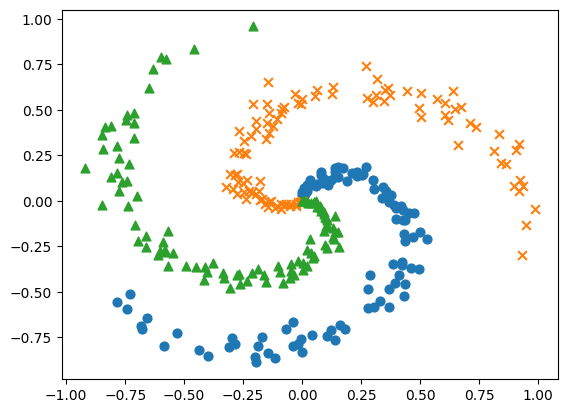

In [3]:
# 図1-31
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

<div style="color: black; font-size: 20px">

![代替テキスト](../images/Section1/図1-31_学習に使用するスパイラルデータセット.png)

図1-31 に示すように、入力は２次元のデータで、分類するクラス数は３つあります。  
これは、直線では分離できないため、非線形な分離線を学習する必要があります。

私たちのニューラルネットワーク

――活性化関数に非線形な Sigmoid 関数を使用した隠れ層のあるニューラルネットワーク――

は、その非線形なパターンを正しく学習できるのでしょうか？  
早速、実験してみましょう。

![代替テキスト](../images/Section1/Caution_1_4-1.png)
</div>

<div style="color: red;">

### **1.4.2 ニューラルネットワークの実装**
</div>

<div style="color: black; font-size: 20px">

それでは、ニューラルネットワークの実装を行います。ここでは隠れ層がひとつ
のニューラルネットワークを実装します。  
まずは、インポート文とイニシャライザの__init__() を示します。
</div>

In [2]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 重みとバイアスの初期化
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # すべての重みと勾配をリストにまとめる
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

<div style="color: black; font-size: 20px">

イニシャライザは３つの引数を受け取ります。  
<span style="font-family: Consolas">input_size</span> は入力層のニューロンの数、<span style="font-family: Consolas">hidden_size</span> は中間層のニューロンの数、そして <span style="font-family: Consolas">output_size</span> は出力層のニューロンの数を表します。

中身の実装では、まずはバイアスを0（ゼロ）ベクトル（<span style="font-family: Consolas">np.zeros()</span>）で初期化します。  
そして、重みを小さなランダム値（<span style="font-family: Consolas">0.01 * np.random.randn()</span>）で初期化します。  
なお、重みを小さなランダム値にすることで、学習がうまく進みやすくなります。  
続いて、必要なレイヤを生成し、それをインスタンス変数の <span style="font-family: Consolas">layers</span> リストにまとめます。  
最後に、このモデルで使用するパラメータと勾配をひとつにまとめます。

![代替テキスト](../images/Section1/Caution_1_4-2.png)
</div>

<div style="color: black; font-size: 20px">

続いて、<span style="font-family: Consolas">TwoLayerNet</span> に３つのメソッドを実装します。  
ここでは、推論を行う <span style="font-family: Consolas">predict()</span> メソッド、順伝播の <span style="font-family: Consolas">forward()</span> メソッド、逆伝播の <span style="font-family: Consolas">backward()</span> メソッドを実装します

In [1]:
def predict(self, x):
    for layer in self.layers:
        x = layer.forward(x)
    return x

def forward(self, x, t):
    score = self.predict(x)
    loss = self.loss_layer.forward(score, t)
    return loss

def backward(self, dout=1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
        dout = layer.backward(dout)
    return dout

<div style="color: black; font-size: 20px">

見てのとおり、ここでの実装はスッキリとしたものになりました！  
私たちはすでにニューラルネットワークで使用する処理ブロックを「レイヤ」として実装してきたので、  
ここでは、それらのレイヤの <span style="font-family: Consolas">forward()</span> と <span style="font-family: Consolas">backward()</span> を適切な順番で呼ぶだけなのです。
</div>

<div style="color: red;">

### **1.4.3 学習用のソースコード**
</div>

<div style="color: black; font-size: 20px">

続いて、学習を行うコードを示します。  
ここでは、学習データを読み込み、ニューラルネットワーク（モデル）とオプティマイザを生成します。  
そして、先ほど示した学習の４ステップの手順に従って学習を行います。  
なお、機械学習の分野では、問題のために設計した手法（ニューラルネットワークや SVM など）を指して、「モデル」と呼ぶことが一般的です。  
それでは、学習用のコードを次に示します。
</div>

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet

# 1. ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. データの読み込み、モデルとオプティマイザの生成
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []
for epoch in range(max_epoch):
    # 3. データのシャッフル
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        # 4. 勾配を求め、パラメータを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1
        
        # 5. 定期的に学習経過を出力
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d | iter %d / %d | loss %.2f'
            % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

<div style="color: black; font-size: 20px">

まずはコードの１.の場所で、ハイパーパラメータを設定します。  
具体的には、学習するエポック数、バッチサイズや隠れ層のニューロン数、学習係数を設定します。  
続いて２.の場所で、データの読み込みを行い、ニューラルネットワーク（モデル）とオプティマイザを生成します。  
私たちはすでに２層のニューラルネットワークを <span style="font-family: Consolas">TwoLayerNet</span> クラスとして、またオプティマイザを <span style="font-family: Consolas">SGD</span> クラスとして実装しました。ここではそれらを利用します。

![代替テキスト](../images/Section1/Hint1_4-1.png)
</div>

<div style="color: black; font-size: 20px">

学習を行う際には、ミニバッチとしてランダムにデータを選びます。  
ここでは、エポック単位でデータのシャッフルを行い、シャッフルを行ったデータに対して、頭から順にデータを抜き出します。  
データのシャッフルには――正確には、データの「インデックス」のシャッフルには――、np.random.permutation() メソッドを使います。  
これは引数に N を与えると、0 から N − 1 までのランダムな並びを作成して返します。  
実際の使用例は次のようになります。
</div>

In [3]:
import numpy as np
np.random.permutation(10)

array([8, 1, 6, 4, 7, 0, 5, 2, 3, 9])

In [4]:
np.random.permutation(10)

array([4, 9, 8, 5, 7, 2, 1, 3, 0, 6])

<div style="color: black; font-size: 20px">

このように、<span style="font-family: Consolas">np.random.permutation()</span> を呼ぶと、データのインデックスを無作為にシャッフルすることができます。  
続いてコードの ４.で勾配を求め、パラメータを更新します。  
最後に ５.で、定期的に学習の結果を出力します。  
ここでは、10 イテレーションごとに損失の平均を求め、それを変数の loss_list に追加します。  
以上が学習を行うためのソースコードです。

![代替テキスト](../images/Section1/Caution_1_4-3.png)
</div>

<div style="color: black; font-size: 20px">

それでは、上のコードを実行してみましょう。  
そうすると、ターミナルに出力される損失の値が順調に下がっていくことが分かります。  
そして、その結果をプロットすると、次のようになります。

![代替テキスト](../images/Section1/図1-32_損失のグラフ.png)
</div>

<div style="color: black; font-size: 20px">

図1-32 のとおり、学習を進めるに従って、損失が減っていることが分かります。  
私たちのニューラルネットワークは、正しい方向に学習しているようです！  
それでは、学習後のニューラルネットワークがどのような分離領域――これは決定境界（<span style="font-family: Consolas">decision boundary</span>）と呼びます――を作っているのかを可視化してみましょう。  
その結果は、図1-33 のようになります。

![代替テキスト](../images/Section1/図1-33_学習後のニューラルネットワークの決定境界.png)

図1-33 に示すように、学習後のニューラルネットワークは、「渦巻き」のパターンを正しく捉えていることが分かります。  
つまり、非線形な分離領域を学習することができたのです！  
このように、ニューラルネットワークは隠れ層を持つことで複雑な表現が可能になります。  
さらに層を重ねることで、その表現力がより豊かになるのがディープラーニングの特徴です。
</div>

<div style="color: red;">

### **1.4.4 Trainer クラス**
</div>

<div style="color: black; font-size: 20px">

前に述べたとおり、本書ではニューラルネットワークの学習を実行する機会が多くあります。  
そこでは、先ほど行ったような学習用のコードを書く必要がありますが、毎回同じようなコードを書くのは退屈でしょう。  
そこで本書では、学習を行うクラスを <span style="font-family: Consolas">Trainer</span> クラスとして提供します。  
中身の実装は、先ほどのソースコードとほとんど同じです。  
一部、新しい機能を追加していますが、詳しい使い方は必要になった際に説明します。  
  
このクラスのイニシャライザは、ニューラルネットワーク（モデル）とオプティマイザを受け取ります。  
具体的には、次のように使います。
</div>

In [ ]:
model = TwoLayerNet(...)
optimizer = SGD(lr=1.0)
trainer = Trainer(model, optimizer)

<div style="color: black; font-size: 20px">

そして、<span style="font-family: Consolas">fit()</span> メソッドを呼んで学習を開始します。  
この <span style="font-family: Consolas">fit()</span> メソッドは表1-1
に示す引数を持ちます。

![代替テキスト](../images/Section1/表1-1_Trainerクラスのfitメソッドの引数.png)

また、<span style="font-family: Consolas">Trainer</span> クラスには <span style="font-family: Consolas">plot()</span> というメソッドがあります。  
これは <span style="font-family: Consolas">fit()</span> メソッドで記録した損失――正確には <span style="font-family: Consolas">eval_interval</span> のタイミングで評価された平均損失――をプロットします。  
それでは、<span style="font-family: Consolas">Trainer</span> クラスを使って学習を行うコードを次に示します。
</div>

In [ ]:
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)
trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

<div style="color: black; font-size: 20px">

このコードを実行すると、前回同様にニューラルネットワークの学習が行われます。  
以前に示した学習用のコードを <span style="font-family: Consolas">Trainer</span> クラスに担わせることで、コードがスッキリしました。  
本書ではこれ以降、<span style="font-family: Consolas">Trainer</span> クラスを使って学習を行います。
</div>

<div style="color: red;">

## **1.5 計算の高速化**
</div>

<div style="color: black; font-size: 20px">

ニューラルネットワークの学習や推論では、多くの計算が必要になります。  
そのため、ニューラルネットワークをいかに高速に計算するかということは重要なテーマです。  
ここでは、ニューラルネットワークの高速化に有効な「ビット精度」と「GPU」について簡単に説明します。

![代替テキスト](../images/Section1/Hint1_5-1.png)
</div>

<div style="color: red;">

### **1.5.1 計算の高速化**
</div>

<div style="color: black; font-size: 20px">

NumPy の浮動小数点数は、標準で64 ビットのデータ型が使用されます。  
（64 ビットかどうかは、読者の環境―― OS やPython/NumPy のバージョンなど――によって変わる可能性があります）。  
実際に64 ビットの浮動小数点数が使われることは、次のコードで確かめられます。
</div>

In [5]:
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

<div style="color: black; font-size: 20px">

NumPy 配列のインスタンス変数 <span style="font-family: Consolas">dtype</span> によって、データの型を見ることができます。  
上の結果は  <span style="font-family: Consolas">float64</span> と表示されていますが、これは 64ビットの浮動小数点数を表します。  
このように NumPy では標準で 64ビットの浮動小数点数が使われます。  
しかし、ニューラルネットワークの推論および学習は、32ビットの浮動小数点数で問題なく――認識精度をほとんど落とすことなく――行えることが知られています。  
メモリの観点では、32ビットは 64ビットの半分になるため、常に 32ビットが好ましいと言えます。  
また、ニューラルネットワークの計算では、データを転送する「バス帯域」がボトルネックになる場合があります。  
その場合も、もちろんデータ型は小さいほうが望ましいです。  
そして、計算速度の点においても、32ビット浮動小数点数のほうが高速に計算できます（浮動小数点数の計算速度は、CPU や GPU のアーキテクチャに依存します）。  
そのため、本書では 32ビット浮動小数点数を優先して使用することにします。  
NumPy で 32ビット浮動小数点数を使うには、次のようにデータ型を <span style="font-family: Consolas">np.float32</span>や <span style="font-family: Consolas">’f’<span> と指定します。

In [6]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [7]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

<div style="color: black; font-size: 20px">

また、ニューラルネットワークの推論に限定すれば、16ビット浮動小数点数で、認識精度をほとんど劣化させずに処理できることが分かっています。  
ただし、NumPy には 16ビットの浮動小数点数が用意されていますが、一般的な CPU や GPU では演算自体は 32ビットで行われます。  
そのため、16ビットの浮動小数点数に変換したところで、計算自体は 32ビットの浮動小数点数で行われてしまい、処理速度の点では恩恵を受けられません。  
しかし、学習した重みを（外部ファイルに）保存するようなケースでは、16ビットの浮動小数点数は有効です。  
具体的には、重みデータを 16ビット精度で保存する場合、32ビットのときの半分の容量で保存することができます。  
そのため本書では、学習した重みを保存するときに限り、16ビットの浮動小数点数に変換することにします。

![代替テキスト](../images/Section1/Hint1_5-2.png)
</div>

<div style="color: red;">

### **1.5.2 GPU（CuPy）**
</div>

<div style="color: black; font-size: 20px">

ディープラーニングの計算は、大量の積和演算によって構成されます。  
この大量の積和演算の多くは並列計算が可能であり、それは CPU よりも GPU が得意とするところです。  
そこで、一般的なディープラーニングのフレームワークでは、CPU に加えて GPU でも実行できるように設計されています。  
本書では、CuPy と呼ばれる Python ライブラリをオプションとして使用します。  
CuPy は、GPU による並列計算を行うためのライブラリです。  
CuPy を利用するには、NVIDIA 製の GPU を備えたマシンが必要になります。  
また、CUDA と呼ばれる  GPU 向けの汎用並列コンピューティング・プラットフォームをインストールする必要があります。  
詳しいインストール方法は、CuPy 公式のインストール・ドキュメント を参照してください。  
この CuPy を使えば、NVIDIA 製の GPU を使って簡単に並列計算を行うことができます。  
さらに重要なことは、CuPy は NumPy と共通の API を持つことです。  
簡単な使用例を示すと、次のようになります。
</div>

In [8]:
import cupy as cp
x = cp.arange(6).reshape(2, 3).astype('f')
x

ModuleNotFoundError: No module named 'cupy'

In [ ]:
x.sum(axis=1)

<div style="color: black; font-size: 20px">

ここで示したように、CuPy は基本的に NumPy と同じ使い方ができます。  
そして、その裏側では GPU を使って計算が行われます。  
これが意味することは、NumPy で書かれたコードがあれば、それを “GPU 版” に簡単に変更できるということです。  
なぜなら、そのとき私たちが行うことは、（基本的には）<span style="font-family: Consolas">numpy</span> を <span style="font-family: Consolas">cupy</span> に置き換えるだけだからです！

![代替テキスト](../images/Section1/Caution_1_5-1.png)
</div>

<div style="color: black; font-size: 20px">

繰り返しになりますが、本書では実装の分かりやすさを優先し、CPU による実装を基本とします。  
ただし計算に多くの時間がかかるコードに関しては、オプションとして CuPy を使った実装を提供します。  
ただし、CuPy を使う場合においても、読者が CuPy を使うことを意識する必要はないようにコード上で配慮しています。  

このコードの実行には CPU で数時間かかりますが、GPU を使えば数十分程度で完了します。  
そして、本書が提供するコードでは、上のソースコードを１行修正するだけで GPU モードで実行できます。  
具体的には「# config.GPU = True」のコメントアウトを外せば、NumPy の代わりに CuPy が使われるようになります。  
それによって、GPU 上で実行され、高速に学習が行われます。  
GPU をお持ちの方は、ぜひ利用してみましょう。

![代替テキスト](../images/Section1/Hint1_5-3.png)
</div>

<div style="color: red;">

## **1.6 まとめ**
</div>

<div style="color: black; font-size: 20px">

本章では、ニューラルネットワークの基本を復習しました。  
まずはベクトルや行列などの数学の復習からスタートし、Python（特に NumPy）の基本的な使い方の確認を行いました。  
そして、ニューラルネットワークの仕組みを見てきました。  
特に、計算グラフの基本パーツ（加算ノードや乗算ノードなど）をいくつか取り上げ、その順伝播と逆伝播を説明しました。  
また、ニューラルネットワークの実装も行いました。私たちはモジュール性を考慮し、ニューラルネットワークの基本パーツをレイヤとして実装しました。  
レイヤの実装では、クラスのメソッドとして <span style="font-family: Consolas">forward()</span> と <span style="font-family: Consolas">backward()</span> を持つこと、インスタンス変数として <span style="font-family: Consolas">params</span> と <span style="font-family: Consolas">grads</span> を持つことを本書の「実装ルール」としました。  
これによって、ニューラルネットワークの実装が見通しの良いものとなりました。  
最後に本章では、人工的な「渦巻きデータセット」に対して、隠れ層がひとつあるニューラルネットワークで学習を行いました。  
そして、そのモデルが正しく学習できることを確認しました。  
これでニューラルネットワークの復習は終わりです。  
これからニューラルネットワークという頼もしい武器を手に、自然言語処理の世界へと乗り込みます。それでは先に進みましょう！
</div>